In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#linear SVM method
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [3]:
path_to_csv = '/content/gdrive/My Drive/glass.csv'

In [4]:
df = pd.read_csv(path_to_csv)

In [5]:
print(df.shape)
df.describe()


(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [34]:
# Assuming the dataset is loaded into a DataFrame named 'df'
X = df.drop('Type', axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
X_train.shape, X_test.shape

((171, 9), (43, 9))

In [37]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [45]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7076923076923077

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.79      0.71        19
           2       0.64      0.70      0.67        23
           3       0.00      0.00      0.00         4
           5       0.80      0.67      0.73         6
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.71        65
   macro avg       0.67      0.62      0.63        65
weighted avg       0.68      0.71      0.69        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-46-bb68aee8f373>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(set(y_test)))
<ipython-input-46-bb68aee8f373>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(set(y_test)))


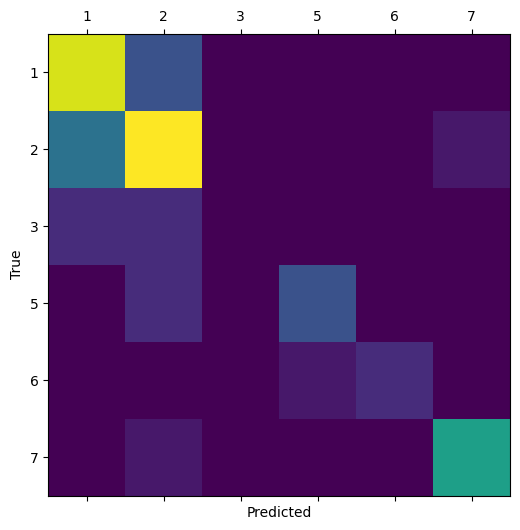

In [46]:
from sklearn.metrics import classification_report, confusion_matrix


# Plot confusion matrix SVM
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm)
ax.set_xticklabels([''] + list(set(y_test)))
ax.set_yticklabels([''] + list(set(y_test)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [40]:
# code for ANN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Read in data
df = pd.read_csv('/content/gdrive/My Drive/glass.csv')

# Split data into training and testing sets
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', random_state=1)

# Train model
mlp.fit(X_train, y_train)

# Make predictions on test set
y_pred = mlp.predict(X_test)

# Evaluate model
print("Accuracy Score:", mlp.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.27692307692307694
              precision    recall  f1-score   support

           1       0.04      0.05      0.05        19
           2       0.41      0.70      0.52        23
           3       0.00      0.00      0.00         4
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        10

    accuracy                           0.28        65
   macro avg       0.24      0.15      0.14        65
weighted avg       0.25      0.28      0.22        65



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

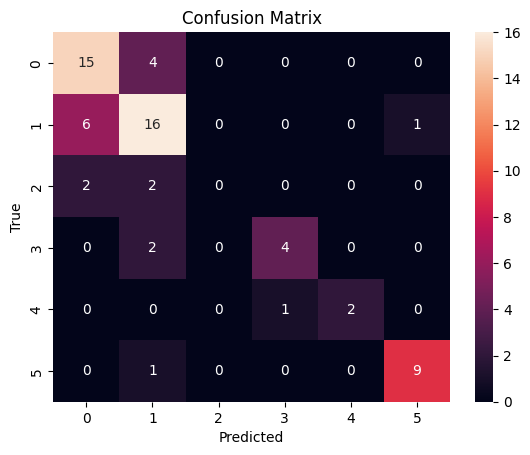

              precision    recall  f1-score   support

           1       0.65      0.79      0.71        19
           2       0.64      0.70      0.67        23
           3       0.00      0.00      0.00         4
           5       0.80      0.67      0.73         6
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.71        65
   macro avg       0.67      0.62      0.63        65
weighted avg       0.68      0.71      0.69        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#visualisation for ANN
import matplotlib.pyplot as plt

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



In [ ]:
#Which algorithm you got better accuracy? Can you justify why?
#as i got accuracy of ANN is more in between the ANN and SVM
#ANNs tend to perform better when there are complex, nonlinear relationships in the data
#that cannot be captured by linear models like SVMs. SVMs can work well on simpler, more linearly separable data.
